In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import seaborn as sns
#import matplotlib as mpl
from datetime import datetime,timedelta
import pytz

from pysolar import solar

from matplotlib.patches import Wedge,Circle

In [3]:
def axes_style(theme):
    
    if theme =='dark':
        fc = '.96'
        ec = '.96'
        gc = '1'
        glw = 1.5
        
    if theme == 'light':
        fc = '.99'
        ec = '.5'
        gc = '.5'
        glw = .2

    plt.rcParams['figure.facecolor'] = '1'
        
    plt.rcParams['axes.facecolor'] = fc
    plt.rcParams['axes.edgecolor'] = ec
    plt.rcParams['axes.linewidth'] = .5

    plt.rcParams['axes.labelcolor'] = '.2'
    plt.rcParams['grid.color'] = gc
    plt.rcParams['grid.linewidth'] = glw

    plt.rcParams['xtick.major.size'] = 0
    plt.rcParams['ytick.major.size'] = 0
    
    plt.rcParams['xtick.color'] = '.2'
    plt.rcParams['ytick.color'] = '.2' 
    
    plt.rcParams['grid.linestyle'] = '-' 


axes_style('light')

# Visualize the diurnal path of the sun 

In [4]:
# roughly Innsbruck
lat = 47
lon = 11

In [5]:
#tz=pytz.timezone('Europe/Berlin')
tz = pytz.UTC

# time range for one day, every 10 minutes
dts = pd.date_range(datetime(2020,6,4,1),datetime(2020,6,4,23),freq='10min',tz=tz)

#only times, when sun is above horizon
dts = [dt for dt in dts if solar.get_altitude(lat,lon,dt.to_pydatetime())>0]

In [6]:
# compute solar elevations and azimuth angles
eles = [solar.get_altitude(lat,lon,dt.to_pydatetime()) for dt in dts]
azis = [solar.get_azimuth(lat,lon,dt.to_pydatetime()) for dt in dts]

In [7]:
# ut times in digital hour format
uts = [dt.hour+dt.minute/60. for dt in dts]

Text(0, 0.5, 'azimuth')

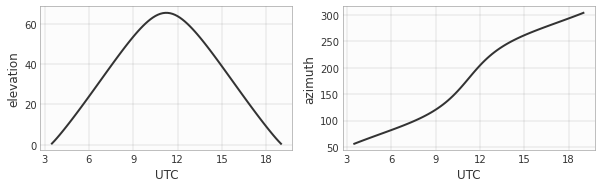

In [8]:
# plot elevation and azimuth in separate axes 

fig=plt.figure(figsize=(7,4))
lw=2

ax1=fig.add_axes([0,0,.5,.5])
ax1.plot(uts,eles,'.-',c='.2',ms=0,lw=lw)
ax1.grid(True)


ax2=fig.add_axes([.6,0,.5,.5])
ax2.plot(uts,azis,'.-',c='.2',ms=0,lw=lw)
ax2.grid(True)

for ax in [ax1,ax2]:
    ax.set_xticks(np.arange(3,21,3))
    ax.set_xlabel('UTC',size=12)

ax1.set_ylabel('elevation',size=12)
ax2.set_ylabel('azimuth',size=12)

In [9]:
# define two colors 
cmap=plt.get_cmap('twilight',16)
c1=cmap(.3)
c2=cmap(.7)

c1=(.3,.6,.9)
c2=(.95,.4,.4)

Text(0, 0.5, 'azimuth')

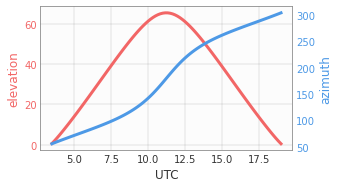

In [10]:
#double axes (?)
ax1=plt.figure(figsize=(7,4)).add_axes([0,0,.5,.5])

lw=3
ms=0
ax1.plot(uts,eles,'.-',c=c2,ms=ms,lw=lw)
ax1.grid(True)
ax2 = ax1.twinx()

ax2.plot(uts,azis,'.-',c=c1,ms=ms,lw=lw)
ax2.grid(False)

ax1.yaxis.label.set_color(c2)
ax1.tick_params(axis='y', colors=c2)

ax2.yaxis.label.set_color(c1)
ax2.tick_params(axis='y', colors=c1)

ax1.set_xlabel('UTC',size=12)
ax1.set_ylabel('elevation',size=12)
ax2.set_ylabel('azimuth',size=12)

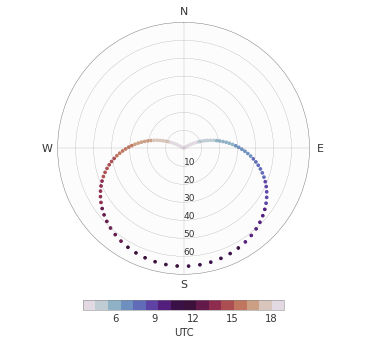

In [11]:
# in polar coordinates

cmap=plt.get_cmap('twilight',16)


fig=plt.figure(figsize=(7,5))

ax1=fig.add_axes([0,0,.7,.7],polar=True)
ax1.set_theta_offset(np.pi/2)

th=[np.pi/180.*(-a) for a in azis]
p1=ax1.scatter(th,eles,marker='o',s=7,c=uts,cmap=cmap)

ax1.set_rgrids(np.arange(10,70,10),  angle=180,fontsize=9)
ax1.set_rlim(0,70)
ax1.set_xticks(np.pi/180.*np.arange(0,360,90))
ax1.set_xticklabels(['N','W','S','E'],fontsize=11);

#cb=plt.colorbar(p1,orientation='horizontal',fraction=.02)

# separate axis for colorbar
ax3=fig.add_axes([0,-0.1,.7,.7]) 
cb=plt.colorbar(p1,ax=ax3,orientation='horizontal',fraction=.04)
cb.set_label('UTC')
cb.set_ticks([6,9,12,15,18])
ax3.axis('off');

plt.show()

In [12]:
# coordinates for separate time scale
dts2 = pd.date_range(datetime(2020,6,4,5),datetime(2020,6,4,18),freq='1h',tz=tz)
eles2 = [solar.get_altitude(lat,lon,dt.to_pydatetime()) for dt in dts2]
azis2 = [solar.get_azimuth(lat,lon,dt.to_pydatetime()) for dt in dts2]
uts2 = [dt.hour+dt.minute/60. for dt in dts2]

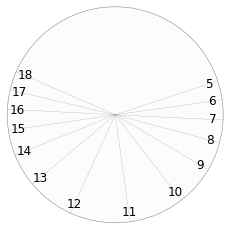

In [13]:
fig=plt.figure(figsize=(7,5))

ax2=fig.add_axes([0,.0,.6,.6],polar=True) 
ax2.set_theta_offset(np.pi/2)


#ax2.plot([0,np.pi],[0,100])
#ax2.axis('off')
ax2.set_xticks([np.pi/180.*(-a)+2*np.pi for a in azis2])
ax2.set_xticks([np.mod(np.pi/180.*(-a)+np.pi,2*np.pi)-np.pi for a in azis2])
ax2.set_thetalim(-np.pi, np.pi)
ax2.set_xticklabels([])
ax2.set_yticks([])
ax2.set_rlim(0,110)
#ax2.tick_params(axis='y', colors='w')

for ut,th in zip(uts2,[np.pi/180.*(-a) for a in azis2]):
    ax2.annotate(str(int(ut)),xy=(th,100),fontsize=12,va='center',ha='center')
    
plt.show()

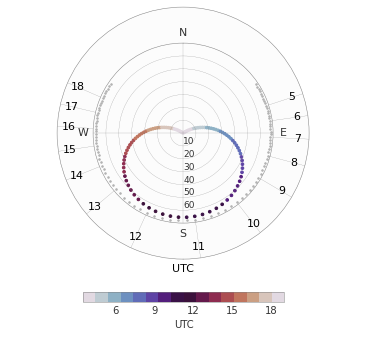

In [14]:
# plorar plor with double theta scale

cmap=plt.get_cmap('twilight',16)

#th_offs=np.pi/2

fig=plt.figure(figsize=(7,5))

ax2=fig.add_axes([0,.0,.7,.7],polar=True) 
ax2.set_theta_offset(np.pi/2)

#ax2.plot([0,np.pi],[0,100])
#ax2.axis('off')
ax2.set_xticks([np.mod(np.pi/180.*(-a)+np.pi,2*np.pi)-np.pi for a in azis2])
ax2.set_thetalim(-np.pi, np.pi)
ax2.set_xticklabels([])
ax2.set_yticks([])
ax2.set_rlim(0,110)
#ax2.tick_params(axis='y', colors='w')

for ut,th in zip(uts2,[np.pi/180.*(-a) for a in azis2]):
    ax2.annotate(str(int(ut)),xy=(th,100),fontsize=11,va='center',ha='center')

ax2.annotate('UTC',xy=(.5,-.02),xycoords='axes fraction',fontsize=11,va='top',ha='center')

ax1=fig.add_axes([0.1,.1,.5,.5],polar=True)
ax1.set_theta_offset(np.pi/2)

th=[np.pi/180.*(-a) for a in azis]
#ax1.plot([th_offs+np.pi/180.*a for a in azis],eles,'.',lw=1,c='.2')
p1=ax1.scatter(th,eles,marker='o',s=7,c=uts,cmap=cmap)
ax1.plot(th,68*np.ones(len(th)),'.',ms=3,c='.7')


ax1.yaxis.label.set_fontsize(19)
#ax1.yaxis.tick_params(fontsize=19)
ax1.set_rgrids(np.arange(10,70,10),  angle=180,fontsize=9)
ax1.set_rlim(0,70)

ax1.set_xticks(np.pi/180.*np.arange(0,360,90))
ax1.set_xticklabels(['N','W','S','E'],fontsize=11);

#ax1.set_xticklabels(['E','','N','','W','','S'],fontsize=12);


ax3=fig.add_axes([0.001,-.12,.7,.7]) 

cb=plt.colorbar(p1,ax=ax3,orientation='horizontal',fraction=.04)
cb.set_label('UTC')
cb.set_ticks([6,9,12,15,18])
ax3.axis('off')

plt.show()

# define as separate plot funtions

In [15]:
def solar_polar(fig,xoffs):
    '''
    plot solar coodinates in polar coodinates
    '''
    #cmap=plt.get_cmap('twilight_shifted',16)
    cmap=plt.get_cmap('twilight',18)

    ax2=fig.add_axes([xoffs,.0,.7,.7],polar=True) 
    ax2.set_theta_offset(np.pi/2)

    #ax2.plot([0,np.pi],[0,100])
    #ax2.axis('off')
    ax2.set_xticks([np.mod(np.pi/180.*(-a)+np.pi,2*np.pi)-np.pi for a in azis2])
    ax2.set_thetalim(-np.pi, np.pi)
    ax2.set_xticklabels([])
    ax2.set_yticks([])
    ax2.set_rlim(0,110)

    for ut,th in zip(uts2,[np.pi/180.*(-a) for a in azis2]):
        ax2.annotate(str(int(ut)),xy=(th,100),fontsize=11,va='center',ha='center')

    ax2.annotate('UTC',xy=(.5,-.02),xycoords='axes fraction',fontsize=11,va='top',ha='center')

    ax1=fig.add_axes([xoffs+0.1,.1,.5,.5],polar=True)
    ax1.set_theta_offset(np.pi/2)

    th=[np.pi/180.*(-a) for a in azis]
    p1=ax1.scatter(th,eles,marker='o',s=7,c=uts,cmap=cmap)
    #ax1.plot(th,69*np.ones(len(th)),'.',ms=3,c='.7')


    ax1.yaxis.label.set_fontsize(19)
    ax1.set_rgrids(np.arange(10,70,10),  angle=180,fontsize=9)
    ax1.set_rlim(0,70)

    ax1.set_xticks(np.pi/180.*np.arange(0,360,90))
    ax1.set_xticklabels(['N','W','S','E'],fontsize=11);


    ax3=fig.add_axes([xoffs,-.12,.7,.7]) 
    cb=plt.colorbar(p1,ax=ax3,orientation='horizontal',fraction=.04)
    cb.set_label('UTC')
    cb.set_ticks([6,9,12,15,18])
    ax3.axis('off')
    
    
    
def solar_cart(fig,xoffs):
    '''
    plot solar coodinates in cartesian coodinates
    '''
    #choose matching colors with polar plot 
    cmap=plt.get_cmap('twilight',16)
    c1=cmap(.3)
    c2=cmap(.7)

    ax1=fig.add_axes([xoffs,0,.6,.6])
    
    ax1.plot(uts,eles,'.-',c=c2,ms=10,linewidth=1)
    ax1.grid(True)
    
    ax2 = ax1.twinx()

    ax2.plot(uts,azis,'.-',c=c1,ms=10,linewidth=1)
    ax2.grid(False)

    ax1.yaxis.label.set_color(c2)
    ax1.tick_params(axis='y', colors=c2)

    ax2.yaxis.label.set_color(c1)
    ax2.tick_params(axis='y', colors=c1)

    ax1.set_xlabel('UTC',size=12)
    ax1.set_ylabel('elevation',size=12)
    ax2.set_ylabel('azimuth',size=12)

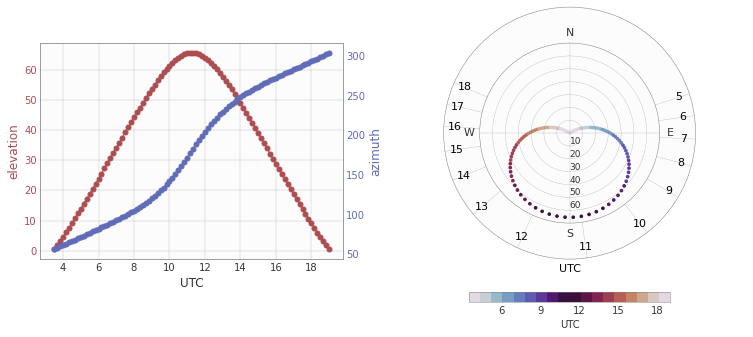

In [16]:
fig=plt.figure(figsize=(7,5))

solar_cart(fig,0)
solar_polar(fig,.7)

#plt.savefig('solar_cart_polar.png',bbox_inches='tight',dpi=300)

In [17]:
def solar_cart(ax):
    
    cmap=plt.get_cmap('twilight',16)

    c1=cmap(.3)
    c2=cmap(.7)
    
    ax.plot(uts,eles,'.-',c=c2,ms=0,linewidth=4)
    ax2 = ax.twinx()

    ax2.plot(uts,azis,'.-',c=c1,ms=0,linewidth=4)
    ax2.grid(False)

    ax.yaxis.label.set_color(c2)
    ax.tick_params(axis='y', colors=c2)

    ax2.yaxis.label.set_color(c1)
    ax2.tick_params(axis='y', colors=c1)

    ax.set_xlabel('UTC',size=12)
    ax.set_ylabel('elevation',size=12)
    ax2.set_ylabel('azimuth',size=12)
    
    ax.grid(True)
    
    
def solar_doublex(ax):

    ax.plot(azis,eles,'.-',c='.3',ms=0,lw=4)
    ax.grid(axis='y')
    ax.set_xlabel('azimuth',size=12)
    ax.set_ylabel('elevation',size=12)


    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xlabel("UTC",size=12)
    ax2.set_xticks(azis2)
    ax2.set_xticklabels([int(u) for u in uts2]);
    
    ax2.grid(axis='x')
    
def solar_polar(ax):
    
    th_offs=np.pi/2
    ax.set_theta_offset(th_offs)

    th=[np.pi/180.*(-a) for a in azis]
    ax.plot(th,eles,'.-',ms=0,lw=3,c='.3',)

    ax.yaxis.label.set_fontsize(19)
    #ax1.yaxis.tick_params(fontsize=19)
    ax.set_rgrids(np.arange(10,70,10),  angle=180,fontsize=9)
    ax.set_rlim(0,70)
    ax.set_xticks(np.pi/180.*np.arange(0,360,90))
    ax.set_xticklabels(['','W','S','E'],fontsize=11);
    ax.tick_params(axis='x', pad=17)

    #hour annotations
    for ut,th,ele in zip(uts2,[np.pi/180.*(-a) for a in azis2],eles2):
        ax.annotate(str(int(ut)),xy=(th,78),fontsize=10,va='center',ha='center', annotation_clip=False)
        ax.plot(th,69,'.',ms=4,c='.2',zorder=3)

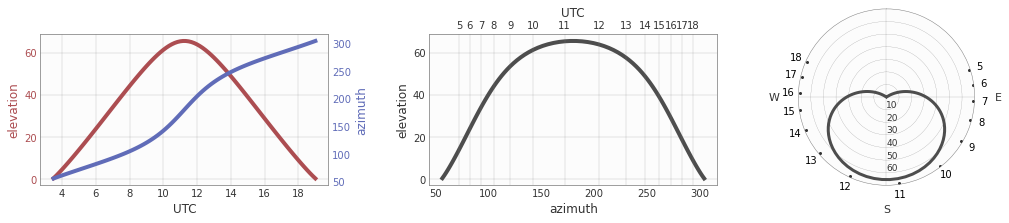

In [18]:
fig=plt.figure(figsize=(10,7))

ax1=fig.add_axes([0,0,.4,.3])
solar_cart(ax1)

ax2=fig.add_axes([.54,0,.4,.3])
solar_doublex(ax2)

ax3=fig.add_axes([1,0,.35,.35],polar=True)
solar_polar(ax3)

# now Wedges!!!

In [19]:
szas = [90.-e for e in eles]
df = pd.DataFrame({'uts':uts,'szas':szas,'azis':azis})

In [22]:
def plot_polar_wedgescolor(ax):
    
    th=[np.pi/180.*(-a) for a in azis]
    th_offset = -np.pi/2
    ax.set_theta_offset(th_offset)
    ax.fill_between(th,0*np.ones(len(szas)),np.array(szas),color='1',lw=3,zorder=0,alpha=1)
    ax.plot(0,0,'o',ms=5,c='.2',zorder=3)

    for m in np.arange(90,20,-10):
        ind = df['szas']<m
        ax.add_artist(Wedge((0.5,0.5),.5, -90+df[ind]['azis'].min(), -90+df[ind]['azis'].max(), 
                            width=0.4, color=cmap((m-5)/90.), transform=ax.transAxes,zorder=-1))

    ax.set_rlim(0,90)
    #ax.grid(False)
    ax.grid(axis='y')
    ax.set_xticks(np.pi/180.*np.arange(0,360,90))
    ax.set_xticklabels(['','W','S','E'],fontsize=11);
    #ax.set_xticks(-np.pi/180.*np.array(azis2))
    #ax.set_xticklabels([str(int(ut)) for ut in uts2])
    ax.tick_params(axis='x', pad=15)
    ax.set_yticklabels('')

    #hour annotations
    for ut,th,ele in zip(uts2,[np.pi/180.*(-a) for a in azis2],eles2):
        ax.annotate(str(int(ut)),xy=(th,100),fontsize=10,va='center',ha='center', annotation_clip=False)
        ax.plot(th,89,'.',ms=5,c='.2',zorder=3)
        
def plot_legend(ax):
    
    p1=ax.imshow([[],[]],cmap=cmap,vmin=0,vmax=90)
    cb=plt.colorbar(p1,ax=ax,orientation='horizontal',fraction=.05)
    cb.set_label('elevation')
    #cb.set_ticks(np.arange(90,0,-10))
    cb.set_ticks(np.arange(0,100,10))
    cb.set_ticklabels(np.arange(90,0,-10))

    ax.axis('off')

C:\Users\david\AppData\Local\Temp\ipykernel_9760\529955433.py:31: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  p1=ax.imshow([[],[]],cmap=cmap,vmin=0,vmax=90)


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (9).

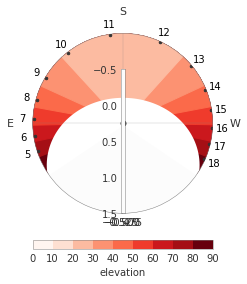

In [24]:
#cmap=plt.get_cmap('rocket',9)
cmap=plt.get_cmap('Reds',9)

fig=plt.figure(figsize=(7,5))

ax1=fig.add_axes([1.2,0,.5,.5],polar=True)
plot_polar_wedgescolor(ax1)

ax1b=fig.add_axes([1.2,-.1,.5,.5])
plot_legend(ax1b)

# 3D plot

In [25]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\david\AppData\Local\Temp\ipykernel_9760\3551412109.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


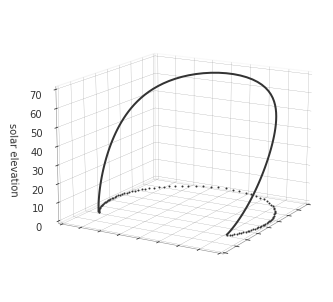

In [26]:
plt.rcParams['figure.facecolor'] = '1'
plt.rcParams['axes.facecolor'] = '1'


fig=plt.figure()
ax = Axes3D(fig)

theta=[-np.pi/2. +np.pi/180.*a for a in azis]
r=1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x,y, eles,'.-',c='.2',lw=2,ms=0)
ax.plot(x,y, np.zeros(len(eles)),'.',c='.2',lw=2,ms=2)

#ax.plot(x[150:151],y[150:151], eles[150:151],'.',ms=20,c='.2')
ax.view_init(elev=15., azim=-150)

ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
fig.set_facecolor('w')
ax.set_facecolor('w') 

ax.set_xticklabels('');
ax.set_yticklabels('');
ax.set_zlabel('solar elevation')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(0,70)


for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
#ax.set_bg('w')
#ax.axis('off')
#plt.show()

#plt.savefig(projectpath+'viz_solar_3d.pdf',bbox_inches='tight')     

plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_9760\2937693598.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,[k,0,.5,.5])


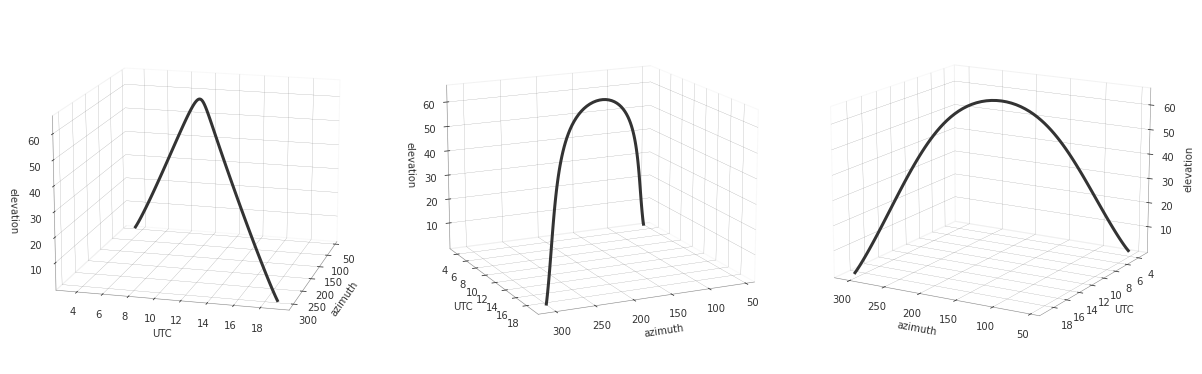

In [27]:
fig=plt.figure(figsize=(10,10))

k=0
for aziv in [15,65,120]:
    ax = Axes3D(fig,[k,0,.5,.5])

    ax.plot(azis,uts, eles,'.-',c='.2',lw=3,ms=0)
    ax.view_init(elev=15., azim=aziv)

    ax.w_xaxis.pane.fill = False
    ax.w_yaxis.pane.fill = False
    ax.w_zaxis.pane.fill = False
    ax.set_xlabel('azimuth')
    ax.set_ylabel('UTC')
    ax.set_zlabel('elevation')
    
        
    k+=.55